In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import os
project_path = os.getcwd() # Ubicación del proyecto

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Bootcamp-DS/Modulo 2/proyecto/Super_Store_data.csv'
df = pd.read_csv(file_path, index_col=[0], parse_dates=['Ship Date', 'Order Date'])
print(df.shape)
df.head()

(2121, 21)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Coordinates
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-12,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1.0000,2,0.00,41.9136,"(37.8393, -84.27)"
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1.0000,1,0.00,219.5820,"(37.8393, -84.27)"
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,"(27.9944, -81.7603)"
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,1,0.00,14.1694,"(36.7783, -119.4179)"
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,"(36.7783, -119.4179)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1 to 9991
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       2121 non-null   object        
 1   Order Date     2121 non-null   datetime64[ns]
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Product Name   2121 n

# EDA

<Axes: >

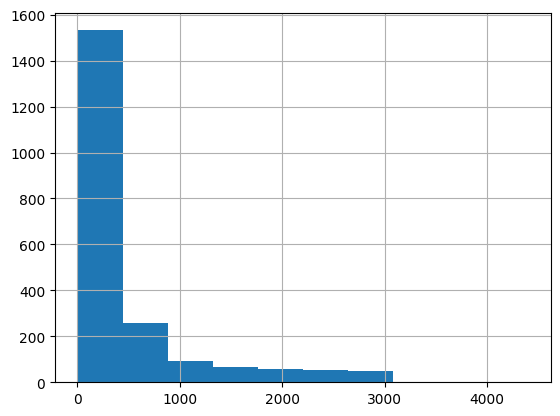

In [ ]:
df.Sales.hist()

In [ ]:
df['Order Date', 'Ship Date', 'Sales', 'State', 'City', 'Segment', 'Ship Mode', 'Profit', 'Custumer ID']

KeyError: ('Order Date', 'Ship Date', 'Sales', 'State', 'City', 'Segment', 'Ship Mode', 'Profit', 'Custumer ID')

In [ ]:
# ¿cuantas veces se repite en el dataset su respectivo valor de 'Order ID'?

order_repetitions = df.groupby('Order ID')['Order ID'].transform('count')
order_repetitions.unique()
# Como máximo incluyen 4 artículos diferentes en el carrito

array([2, 1, 3, 4])

<Axes: >

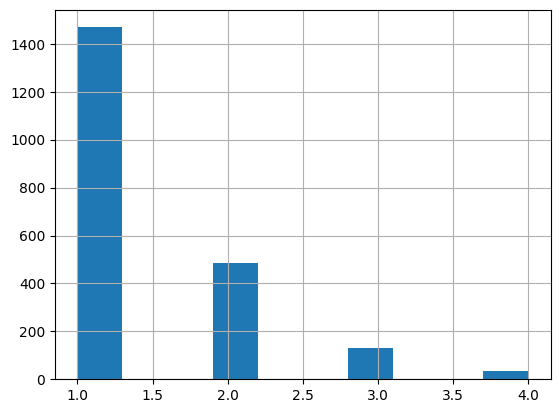

In [ ]:
# La mayoría de compras se hacen con solo 1 producto
order_repetitions.hist()

In [ ]:
productName_per_id = df.groupby('Product Name')['Product ID'].nunique()
productName_per_id[productName_per_id > 1]
# Hay productos asociados a IDs diferentes

Product Name
Eldon Wave Desk Accessories      2
Eldon Wave Desk Accessories--    2
KI Adjustable-Height Table       2
Staple-based wall hangings       2
Name: Product ID, dtype: int64

In [ ]:
# Cantidad de productos en venta
print(f"Cantidad total de productos: {df['Product Name'].unique().shape[0]}\n\nCantidad por Subcategoría:")
df.groupby('Sub-Category')['Product Name'].nunique()

Cantidad total de productos: 541

Cantidad por Subcategoría:


Sub-Category
Bookcases       73
Chairs         127
Furnishings    259
Tables          82
Name: Product Name, dtype: int64

<Axes: xlabel='Order Date'>

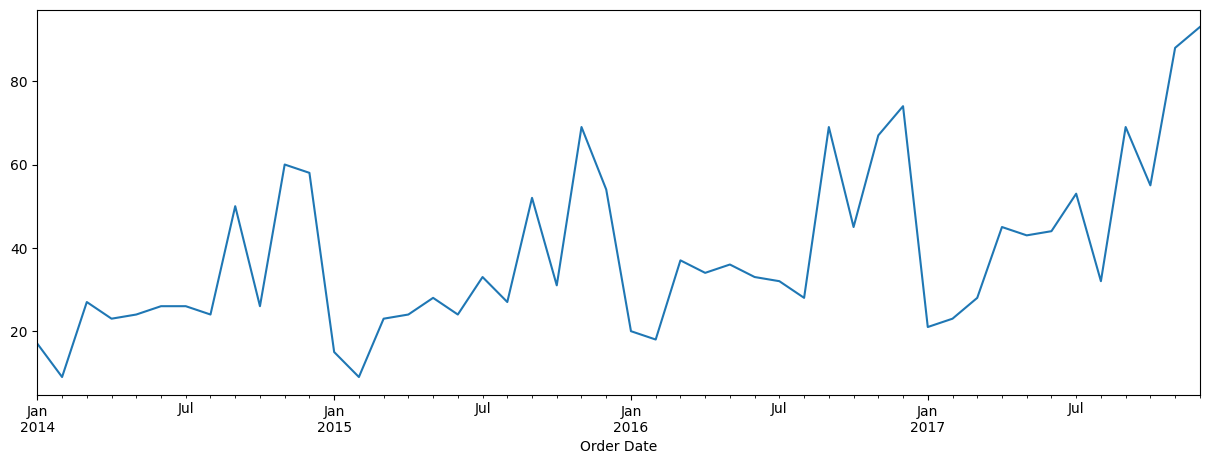

In [ ]:
# Tendencia general de la cantidad de compras que hacen los usuarios

df.groupby('Order Date')['Order ID'].nunique().groupby(pd.Grouper(freq='M')).sum().plot(figsize=(15, 5))
# Notamos que es una tendencia creciente y multiplicativa
# Diciembre siempre es nuestro pico respecto al resto de meses
# El 2do pico más grande corresponde a Septiembre
# A inicios del año hay un bajón en las ventas

# Variables de interés

1. ¿Cuál es la distribución de las ventas ('Sales') en el dataset?
    - Sales
2. Análisis de tendencias por Estado y por Tipo de Cliente
    - State, sales, State, City, Segment
3. ¿Vale la pena incluir un descuento para personas que contratan First Class?

    Operación: Tendencia por clase, tendencia de ‘Custumer ID’ unique por mes
    - Ship Mode, Profit, Custumer ID, ...

    es viable?...

    Cómo ha evolucionado el uso de 1st class en el tiempo respecto a las alternativas? (profit y número de compras por ...)

    Hay una diferencia significativa de ganancia entre los Ship Mode? (BoxPlot)

    El profit actual es suficiente incluso luego del descuento?

    cuánto como máximo podemos permitirnos de descuento?

    cuántos posibles compradores podríamos transferir a first class?

    cuántos de first class se cambian a una inferior??

    ¿Cuántos necesitaríamos para que la campaña tenga ganancias (durante su ejecución) ?

    Tenemos clientes fidelizados??


# Data for preprocesing

In [ ]:
necessary_features = ['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Coordinates', 'State', 'City', 'Segment', 'Ship Mode', 'Sub-Category', 'Product ID', 'Product Name', 'Discount', 'Sales', 'Quantity', 'Profit']
df2 = df.loc[:, necessary_features]
df2.loc[:, 'Product Name'] = df2['Product Name'].str.replace('--', '')

print(df2.shape)
df2.head()

(2121, 16)


,Order ID,Customer ID,Order Date,Ship Date,Coordinates,State,City,Segment,Ship Mode,Sub-Category,Product ID,Product Name,Discount,Sales,Quantity,Profit
Row ID,,,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,2016-11-12,2016-11-11,"(37.8393, -84.27)",Kentucky,Henderson,Consumer,Second Class,Bookcases,FUR-BO-10001798,Bush Somerset Collection Bookcase,0.00,1.0000,2,41.9136
2,CA-2016-152156,CG-12520,2016-11-08,2016-11-11,"(37.8393, -84.27)",Kentucky,Henderson,Consumer,Second Class,Chairs,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.00,1.0000,1,219.5820
4,US-2015-108966,SO-20335,2015-10-11,2015-10-18,"(27.9944, -81.7603)",Florida,Fort Lauderdale,Consumer,Standard Class,Tables,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,0.45,957.5775,5,-383.0310
6,CA-2014-115812,BH-11710,2014-06-09,2014-06-14,"(36.7783, -119.4179)",California,Los Angeles,Consumer,Standard Class,Furnishings,FUR-FU-10001487,Eldon Expressions Wood and Plastic Desk Access...,0.00,48.8600,1,14.1694
11,CA-2014-115812,BH-11710,2014-06-09,2014-06-14,"(36.7783, -119.4179)",California,Los Angeles,Consumer,Standard Class,Tables,FUR-TA-10001539,Chromcraft Rectangular Conference Tables,0.20,1706.1840,9,85.3092


# Pruning

## Criterio: `Sales`

Dividiremos en 3 partes para que

### Valores de venta muy pequeños  **y**  Profit (Ganancias) ilógicas

Es imposible que la ganancia de una venta sea mucho mayor al precio que cobraste por ella. Esto se explica con la ecuación:

`profit = income - cost_of_production`

Para que `profit > income` → `cost_of_production < 0`. **Por absurdo** esto es falso, por lo que descartamos los registros con estos valores.

In [ ]:
df2 = df2[(df2.Sales>df2.Profit) & (df2.Sales>1)]

### Outliers

Dividiremos en 3 partes devido a que el análisis de outliers depende de la cantidad de registros que poseamos de nuestros grupos

In [ ]:
# Creamos columnas útiles para el análisis de outliers para los 3 casos a continuación

df2['unit_value'] = df2.Sales/df2.Quantity
df2['orderId_count'] = df2.groupby('Product ID')['Order ID'].transform('nunique')
df2['unit_value_median'] = df2.groupby('Product ID')['unit_value'].transform('median')

#### Identificamos Outliers

##### Para valores atipicos para productos que han sido comprado solo 2 veces

Al poseer solo 2 registros por grupo es totalmente imposible aplicar IQR y la media aquí no tiene sentido porque tendrá la misma ditancia entre los dos valores.

Debido a esto, solo eliminaremos los valores relativamente más lejanos al valor máximo entre los dos.

In [ ]:
mask_repeated_2 = df2.orderId_count==2

max_val = df2.groupby('Product ID')['unit_value'].transform('max')
min_val = df2.groupby('Product ID')['unit_value'].transform('min')
absolute_difference_2 = np.abs(min_val/max_val -1)

condition_repeated_2 = (absolute_difference_2<=0.4) & mask_repeated_2

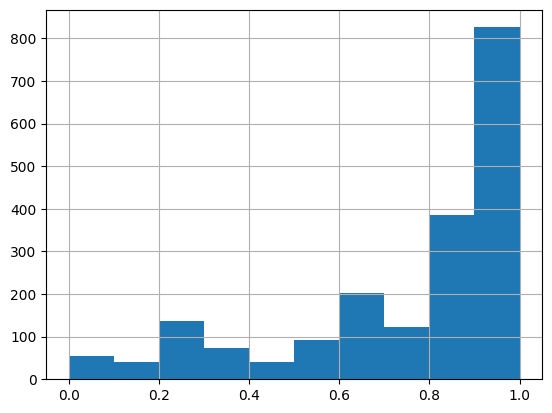

In [ ]:
absolute_difference_2.hist()
plt.show()

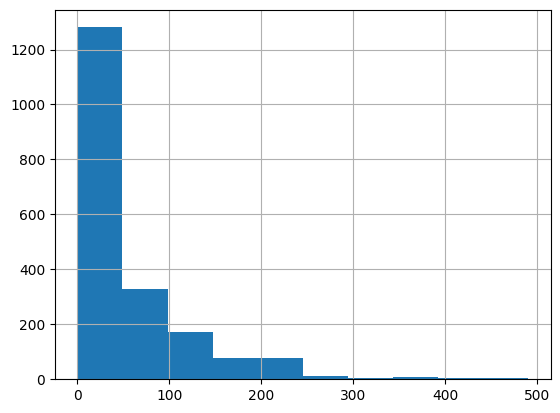

In [ ]:
min_val.hist()
plt.show()

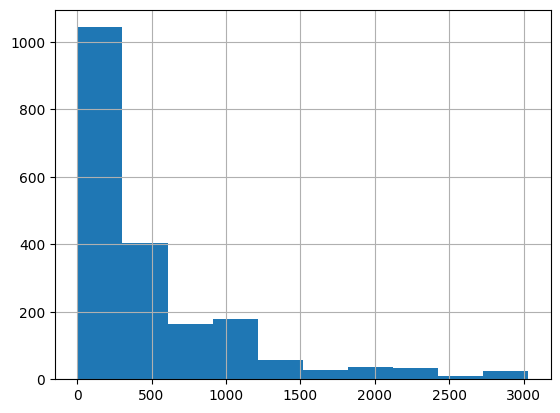

In [ ]:
max_val.hist()
plt.show()

##### Para valores atípicos para productos que han sido comprados de 3 - 5 veces

Por tener pocos datos aún no podemos aplicar método de IQR.

Debido a esto, aplicamos nuestra medida de distancia relacionada a la mediana. `absolute_difference_2_5` responde a ¿Cuál es el % absoluto de diferencia entre el valor analizada y la mediana del grupo?

Este valor puede ser positivo si `unit_value > unit_value_median` y negativo en el caso contrario. Por eso es necesario aplicar un valor absoluto a la operación.

In [ ]:
mask_repeated_3_5 = (df2.orderId_count>2) & (df2.orderId_count<6)
absolute_difference_3_5 = np.abs(df2.unit_value/df2.unit_value_median -1)

condition_repeated_3_5 = (absolute_difference_3_5<=0.4) & mask_repeated_3_5

<Axes: >

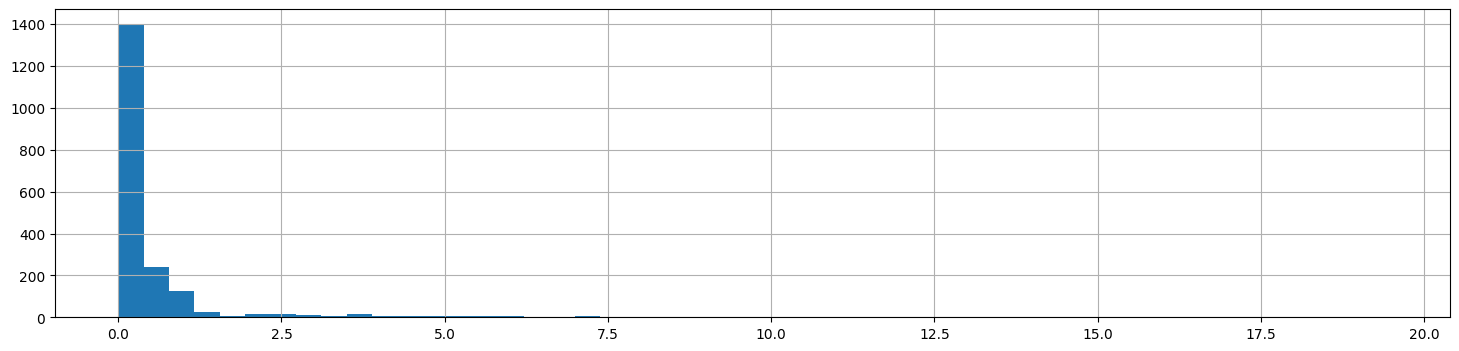

In [ ]:
absolute_difference_3_5[absolute_difference_3_5<20].hist(bins=50, figsize=(18, 4))

##### Para valores atípicos para productos que han sido comprados de 6 o más veces

In [ ]:
# Funciones para calcular el Rango Intercuatil

th = 1.5
def lower_bound(x):
    x = x.copy(deep=True)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return Q1 - th * (Q3 - Q1)

def upper_bound(x):
    x = x.copy(deep=True)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return Q1 + th * (Q3 - Q1)

In [ ]:
mask_repeated_6more = df2.orderId_count>5

lower_bound_values = df2.groupby('Product ID')['unit_value'].transform(lower_bound)
upper_bound_values = df2.groupby('Product ID')['unit_value'].transform(upper_bound)

condition_repeated_6more = ((df2.unit_value > lower_bound_values) & (df2.unit_value < upper_bound_values)) & mask_repeated_6more

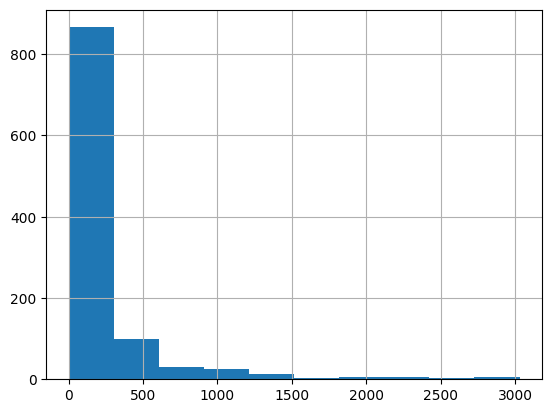

In [ ]:
df2[~condition_repeated_6more].unit_value.hist()
plt.show()

#### Eliminamos los outliers

In [ ]:
df2 = df2[(df2.orderId_count==1) | condition_repeated_2 | condition_repeated_3_5 | condition_repeated_6more].copy(deep=True)
df2.drop(['orderId_count', 'unit_value_median'], axis=1, inplace=True)

print(f'Antes de eliminar outliers: {df.shape}')
print(f'Luego de eliminar outliers: {df2.shape}')
print(f'Total de registros eliminados: {df.shape[0]-df2.shape[0]}\n\n')
df2.info()

Antes de eliminar outliers: (2121, 21)
Luego de eliminar outliers: (1474, 17)
Total de registros eliminados: 647


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 4 to 9990
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1474 non-null   object        
 1   Customer ID   1474 non-null   object        
 2   Order Date    1474 non-null   datetime64[ns]
 3   Ship Date     1474 non-null   datetime64[ns]
 4   Coordinates   1474 non-null   object        
 5   State         1474 non-null   object        
 6   City          1474 non-null   object        
 7   Segment       1474 non-null   object        
 8   Ship Mode     1474 non-null   object        
 9   Sub-Category  1474 non-null   object        
 10  Product ID    1474 non-null   object        
 11  Product Name  1474 non-null   object        
 12  Discount      1474 non-null   float64       
 13  Sales         1474 non-

# Feature Engeniering

## Feature Creation

Recordemos que anteriormente, en la sección de **Prunning** ya creamos `'unit_value'`

Este valor representa el valor unitario de precio a la venta del producto.

### Date features

In [ ]:
#@title <code>'Season'</code> en la que la orden se efectuó

# adding the season in base of the month
for index, date in df2['Order Date'].items():
  if(date.month>=3 and date.month<6):
    df2.at[index, "Season"]='Spring'
  elif(date.month>=6 and date.month<9):
    df2.at[index, "Season"]='Summer'
  elif(date.month>=9 and date.month<12):
    df2.at[index, "Season"]='Fall'
  else:
   df2.at[index, "Season"]='Winter'

In [ ]:
#@title <code>'period'</code> entre la fecha de compra más reciente realizada y la fecha de facturación

maxfecha = df2['Order Date'].max() # esta fecha se corresponde con la transacción (compra) más reciente realizada por cualquier cliente
df2['period'] = maxfecha - df2['Order Date']

In [ ]:
#@title <code>'year'</code>, <code>'month'</code>, <code>'day_of_week'</code> en el que la orden se efectuó

df2['year'] = df2['Order Date'].dt.year
df2['month'] = df2['Order Date'].dt.month
df2['day_of_week'] = df2['Order Date'].dt.day_of_week

### Order the features

In [ ]:
df2.columns

Index(['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Coordinates',
       'State', 'City', 'Segment', 'Ship Mode', 'Sub-Category', 'Product ID',
       'Product Name', 'Discount', 'Sales', 'Quantity', 'Profit', 'unit_value',
       'Season', 'period', 'year', 'month', 'day_of_week'],
      dtype='object')

In [ ]:
features = ['Order ID', 'Customer ID', 'Ship Mode', 'Order Date', 'Ship Date',
            'period', 'Season', 'year', 'month', 'day_of_week', 'Coordinates',
            'State', 'City', 'Segment', 'Sub-Category', 'Product ID', 'Product Name',
            'Discount', 'Sales', 'Quantity', 'unit_value', 'Profit']
df2 = df2[features]
print(df2.shape)


(1474, 22)


## Feature Scaling

# Save Data

In [ ]:
file_name = 'data_cleaned.csv'
path_to_save = os.path.join(project_path, file_name)

df2.to_csv(path_to_save)


2.- ¿Existen diferencias significativas en la cantidad de productos vendidos
('Quantity') entre las diferentes categorías de productos?

In [ ]:
ventas_categorias=df2.groupby('Sub-Category')[ 'Quantity'].sum().sort_values(ascending=False).reset_index()
ventas_categorias

,Sub-Category,Quantity
0,Furnishings,2775
1,Chairs,1887
2,Tables,1031
3,Bookcases,655


In [ ]:
print(ventas_categorias.describe())

          Quantity
count     4.000000
mean   1587.000000
std     945.005115
min     655.000000
25%     937.000000
50%    1459.000000
75%    2109.000000
max    2775.000000


<ipython-input-89-16ced0fd3b0e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_categorias, x='Sub-Category', y='Quantity', palette='viridis')


Text(0.5, 1.0, 'Cantidad de Productos por Categoría')

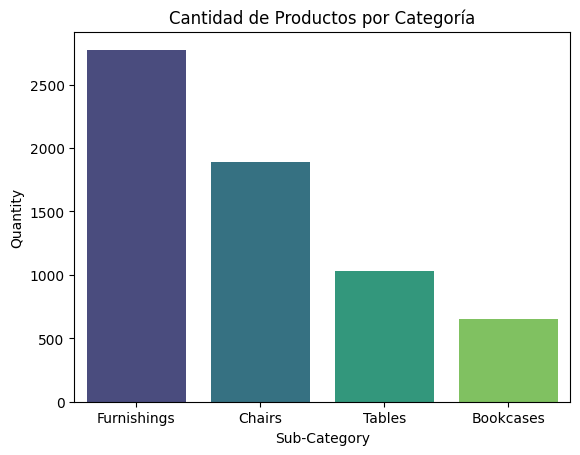

In [ ]:
sns.barplot(data=ventas_categorias, x='Sub-Category', y='Quantity', palette='viridis')
plt.title('Cantidad de Productos por Categoría')

#Podemos visualizar el anális Univariado explorando la columna 'Quantity'.

In [ ]:
total_ventas_categoria=ventas_categorias['Quantity'].sum()

In [ ]:
ventas_categorias['% Productos_Vendidos']= ((ventas_categorias['Quantity']/ total_ventas_categoria) * 100).round(2)

In [ ]:
ventas_categorias # El 40% de las ventas se concentran en la categoria de Furnishings

,Sub-Category,Quantity,% Productos_Vendidos
0,Furnishings,2775,43.71
1,Chairs,1887,29.73
2,Tables,1031,16.24
3,Bookcases,655,10.32


3.-¿Cuáles son los estados con el mayor volumen de ventas y cómo varía esto por categoría de producto?

In [ ]:
ventas_por_estado = df2.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
top_5_ventas_por_estado=ventas_por_estado.head()
top_5_ventas_por_estado
#Los 5 estados con mayor venta

,State,Sales
0,California,103419.058891
1,Texas,59729.494418
2,New York,57954.890125
3,Ohio,47660.924444
4,Florida,30582.977435


<ipython-input-94-bacd6af5c2f3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_ventas_por_estado, x='State', y='Sales', palette= 'bright')


Text(0.5, 1.0, 'Top 5 de los estados con mayor ventas')

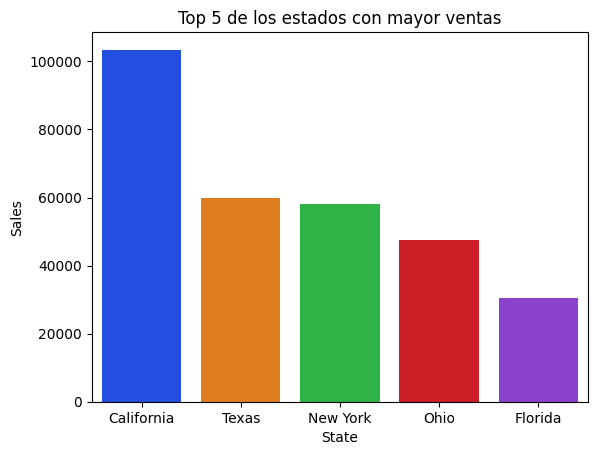

In [ ]:
sns.barplot(data=top_5_ventas_por_estado, x='State', y='Sales', palette= 'bright')
plt.title('Top 5 de los estados con mayor ventas')
#Se visualiza los 5 estados con mayor ventas, teniendo a la cabeza al estado de California con un total de ventas por encima del 40% de diferencia a los demas estados.

In [ ]:
ventas_categorias = df2.groupby([ 'Sub-Category', 'State'])['Sales'].sum().sort_values(ascending=False).reset_index()
ventas_categorias.head() # Se adiciona la Categoria para poder realizar el filtro

,Sub-Category,State,Sales
0,Chairs,California,41218.316391
1,Tables,California,31633.280000
2,Chairs,New York,31042.103697
3,Chairs,Texas,25808.115153
4,Chairs,Ohio,22147.761943


In [ ]:
top_sales_by_category_state = ventas_categorias.groupby('Sub-Category').apply(lambda x: x.nlargest(3, 'Sales')).reset_index(drop=True)
top_sales_by_category_state # Obtenemos los 3 estados con las mayores ventas por categoria.

,Sub-Category,State,Sales
0,Bookcases,California,20224.432500
1,Bookcases,New York,11101.432000
2,Bookcases,Texas,10744.891400
3,Chairs,California,41218.316391
4,Chairs,New York,31042.103697
5,Chairs,Texas,25808.115153
6,Furnishings,California,10343.030000
7,Furnishings,New York,5933.510000
8,Furnishings,Florida,5890.815435
9,Tables,California,31633.280000


Text(0.5, 1.0, 'Ventas por Categoría y Estado')

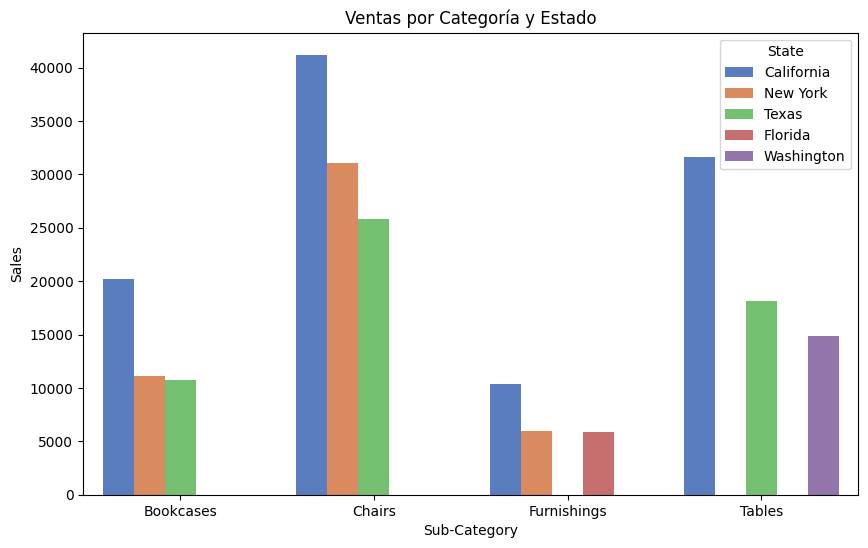

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales_by_category_state, x='Sub-Category', y='Sales', hue='State', palette='muted')
plt.title('Ventas por Categoría y Estado')
#Podemos visualizar un analisis Bivariado entre las columnas de Categoría y Estado en cuanto a las ventas.

Top Cliente que me compran con mayor frecuencia por segmento.

In [ ]:
top_clientes=df2.groupby('Segment')['Customer ID'].value_counts().sort_values(ascending=False).reset_index(name='count')
top_clientes

,Segment,Customer ID,count
0,Consumer,SV-20365,10
1,Consumer,JE-15745,9
2,Consumer,LC-16885,8
3,Home Office,PP-18955,8
4,Consumer,SC-20095,7
...,...,...,...
634,Consumer,SG-20605,1
635,Consumer,SF-20065,1
636,Consumer,SC-20845,1
637,Consumer,SC-20575,1


In [ ]:
top_clientes_frecuentes = top_clientes.groupby('Segment').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_clientes_frecuentes #Observamos el top de los 3 clientes que nos compran frecuentemente por segmentos.

,Segment,Customer ID,count
0,Consumer,SV-20365,10
1,Consumer,JE-15745,9
2,Consumer,LC-16885,8
3,Corporate,JD-16150,7
4,Corporate,SM-20950,6
5,Corporate,NS-18640,6
6,Home Office,PP-18955,8
7,Home Office,MP-18175,6
8,Home Office,Dp-13240,6


4. ¿Cómo varían las ventas y la cantidad de productos vendidos a lo largo de las diferentes estaciones del año?

In [ ]:
#excluding rows when order date > shipping date
df3= df2[df2['Order Date']<df2['Ship Date']]
df3.head(3)

In [ ]:
dfseason_numprod=df3.groupby(['year','Season'])['Quantity'].sum().reset_index()#.sort_values(by=['year','month'], ascending=True)
dfseason_numprod

[Text(0.5, 1.0, 'La cantidad de Productos vendidos en las diferentes Estaciones del año')]

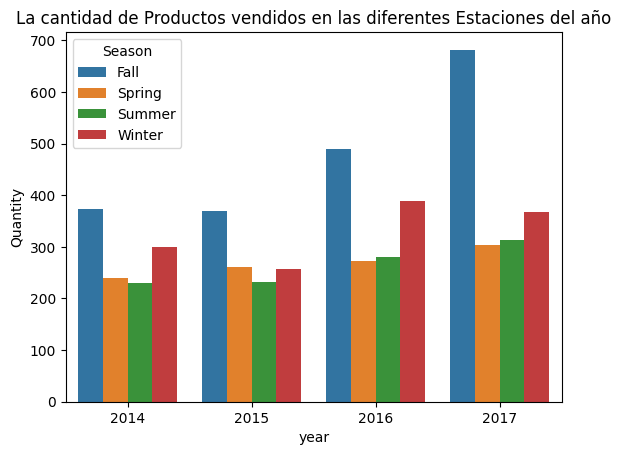

In [ ]:
sns.barplot(x='year', y='Quantity', hue='Season', data=dfseason_numprod).set(title='La cantidad de Productos vendidos en las diferentes Estaciones del año')

La mayor cantidad de productos vendidos se ve en Fall. Esto puede darse por los descuentos que se dan en Black Fridays.

In [ ]:
dfseason_sales=df3.groupby(['year','Season'])['Sales'].sum().reset_index()
dfseason_sales.head()

,year,Season,Sales
0,2014,Fall,37004.692308
1,2014,Spring,22947.281429
2,2014,Summer,21058.613100
3,2014,Winter,26733.616144
4,2015,Fall,44967.776130


[Text(0.5, 1.0, 'Ventas en las diferentes Estaciones del año')]

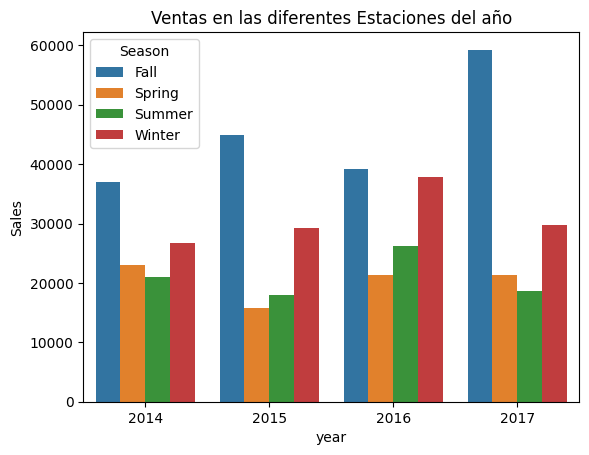

In [ ]:
sns.barplot(x='year', y='Sales', hue='Season', data=dfseason_sales).set(title='Ventas en las diferentes Estaciones del año')

Las mayores ventas se registran en Fall y Winter. Fall for Black Friday y Winter por todas las ofertas que se ofrecen en las fiestas de Navidad

5. Crea un gráfico de barras que muestre las ventas totales por estado. ¿Qué
estados son los más rentables?

In [ ]:
dfstate=df3.groupby(['State'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False) #selecting the 10 top states with sales
dfstate

In [ ]:
fig = px.bar(dfstate, x="State", y="Sales", title="Ventas Totales por Estado")
fig.show()

In [ ]:
dfstate=df3.groupby(['State','Segment'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False) #selecting the 10 top states with sales
dfstate

In [ ]:
fig = px.bar(dfstate, x="State", y="Sales", color='Segment', title="Ventas Totales por Estado y por Segmento")
fig.show()

Los estados mas rentables son: California, New York, Texas, Ohio, Florida, Washington and Pennsylvania. Tambien observamos que el Segmento "Consumer"-B2C, es el segmento fuerte en todos los estados nombrados inicialmente.

8. Productos que dan más y menos ingresos por Segment y Profit

In [ ]:
# Seleccionando Profit positivo en los ultimos dos anios
dfprof_positive = df3.loc[(df3.Profit > 0) & (df3.year>=2016),:]
dfprof_positive.head()

In [ ]:
dfprod_vend = dfprof_positive.groupby(['Product ID'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)

filter=dfprof_positive['Product ID'].isin(dfprod_vend['Product ID'])
prod_subset=dfprof_positive[filter]
prod_subset.head()

,Order ID,Customer ID,Ship Mode,Order Date,Ship Date,period,Season,year,month,day_of_week,...,City,Segment,Sub-Category,Product ID,Product Name,Discount,Sales,Quantity,unit_value,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,
150,CA-2016-114489,JE-16165,Standard Class,2016-12-05,2016-12-09,390 days,Winter,2016,12,0,...,Franklin,Corporate,Chairs,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.0,1951.840,8,243.980,585.5520
1201,CA-2016-114727,LS-16945,Standard Class,2016-07-18,2016-07-24,530 days,Summer,2016,7,0,...,Denver,Corporate,Chairs,FUR-CH-10002335,Hon GuestStacker Chair,0.2,544.008,3,181.336,40.8006
1212,CA-2016-137050,SW-20755,Second Class,2016-07-14,2016-07-18,534 days,Summer,2016,7,3,...,New York City,Corporate,Bookcases,FUR-BO-10004695,O'Sullivan 2-Door Barrister Bookcase in Odessa...,0.2,579.136,4,144.784,21.7176
1469,CA-2017-139199,DK-12835,Standard Class,2017-12-09,2017-12-13,21 days,Winter,2017,12,5,...,Detroit,Corporate,Chairs,FUR-CH-10000847,Global Executive Mid-Back Manager's Chair,0.0,872.940,3,290.980,226.9644
2024,CA-2016-168354,RH-19510,First Class,2016-09-19,2016-09-21,467 days,Fall,2016,9,0,...,Providence,Home Office,Chairs,FUR-CH-10004675,"Lifetime Advantage Folding Chairs, 4/Carton",0.0,872.320,4,218.080,244.2496


In [ ]:
dfprod_grp = prod_subset.groupby(['Product Name','Segment'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
unique_products = set(dfprod_grp['Product Name'])
unique_products

{"Global Executive Mid-Back Manager's Chair",
 'Global Leather and Oak Executive Chair, Black',
 'HON 5400 Series Task Chairs for Big and Tall',
 'Hon 4070 Series Pagoda Armless Upholstered Stacking Chairs',
 'Hon 5100 Series Wood Tables',
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
 'Hon GuestStacker Chair',
 'Lifetime Advantage Folding Chairs, 4/Carton',
 "O'Sullivan 2-Door Barrister Bookcase in Odessa Pine",
 'SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black'}

In [ ]:
fig = px.bar(dfprod_grp, x="Product Name", y="Profit", color='Segment', title="Los 10 Productos mas vendidos por Consumidor en los ultimos dos anios" )
fig.show()

En esta grafica se muestra los productos que ofrecen un profit por consumidor rentable y alto en los dos ultimos anios.

In [ ]:
#Seleccionamos productos con Profit negativo
dfprof_negative = df3.loc[(df2.Profit <=0) & (df2.year>=2016),:]
dfprof_negative.head()

In [ ]:
dfprod_novend = dfprof_negative.groupby(['Product ID'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True).head(20)



In [ ]:
filter=dfprof_negative['Product ID'].isin(dfprod_novend['Product ID'])
prod_no_subset=dfprof_negative[filter]
prod_no_subset.head()

In [ ]:
dfprod_grp2 = prod_no_subset.groupby(['Product Name','Segment'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
unique_products = set(dfprod_grp2['Product Name'])
unique_products

{'BPI Conference Tables',
 'Balt Solid Wood Round Tables',
 'Bestar Classic Bookcase',
 'Bevis Boat-Shaped Conference Table',
 'BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables',
 'Bretford Rectangular Conference Table Tops',
 'Bretford ÒJust In TimeÓ Height-Adjustable Multi-Task Work Tables',
 'Bush Advantage Collection Racetrack Conference Table',
 'Chromcraft 48" x 96" Racetrack Double Pedestal Table',
 'Chromcraft Bull-Nose Wood 48" x 96" Rectangular Conference Tables',
 'Chromcraft Bull-Nose Wood Oval Conference Tables & Bases',
 'Chromcraft Round Conference Tables',
 'Global Enterprise Series Seating High-Back Swivel/Tilt Chairs',
 'Hon 4-Shelf Metal Bookcases',
 'Hon 5100 Series Wood Tables',
 'Luxo Professional Fluorescent Magnifier Lamp with Clamp-Mount Base',
 "O'Sullivan 4-Shelf Bookcase in Odessa Pine",
 'Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer',
 'Tenex Antistatic Computer Chair Mats',
 'Tenex Chairmat w/ Average Lip, 4

In [ ]:
fig = px.bar(dfprod_grp2, x="Product Name", y="Profit", color='Segment', title="Los 20 Productos con Profit Negativo en los dos ultimos anios")
fig.show()

En los dos ultimos anios la compania ha tenido profit negativo en varios productos. Esto puede ayudar a tomar decisiones de que productos podrian ser descontinuados.